In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [2]:
# method for importing the dataset
def import_dataset(filename):
    import pandas as pd
    dataset = pd.read_csv(filename)
    return dataset

In [3]:
# Data Preprocessing

train_df = import_dataset('sign_mnist_train.csv')
test_df = import_dataset('sign_mnist_test.csv')
    
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']
    
# Label Binarizer to reduce the processing speed. It is used to convert the labels into a matrix
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

# Reshape the data
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [4]:
# model creation
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)


In [6]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))
# the model is saved in the file CSE572_DataMining.h5 and can be used for testing
model.save('CSE572_DataMining.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        

c:\Users\mohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


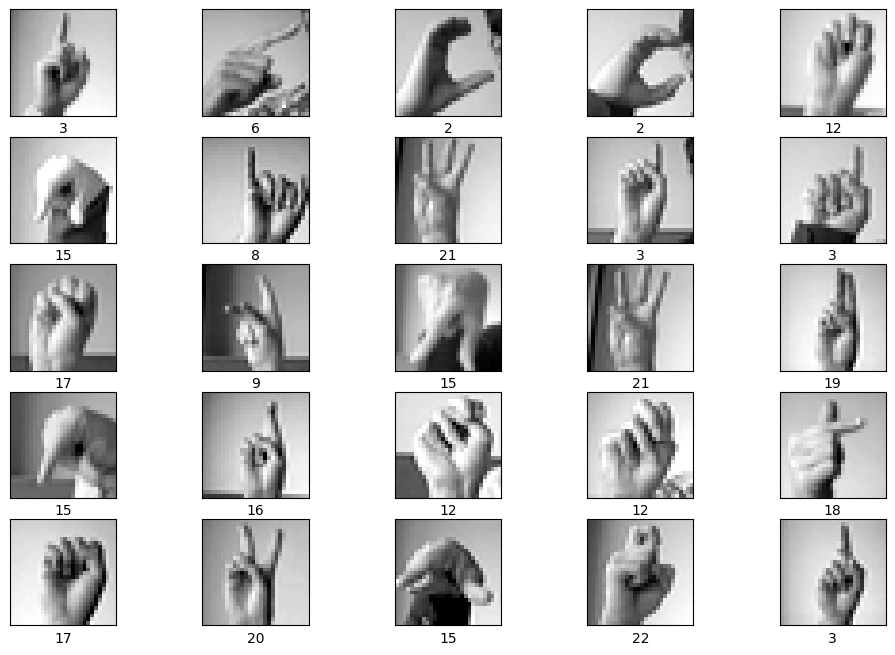

In [30]:
import matplotlib.pyplot as plt
import numpy as np
#labels = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',19:'U',20:'V',21:'W',22:'X', 23:'Y'}

# visualize the Data along with the labels

plt.figure(figsize=(12,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    # add label to the image
    plt.xlabel(np.argmax(y_train[i]))
plt.show()

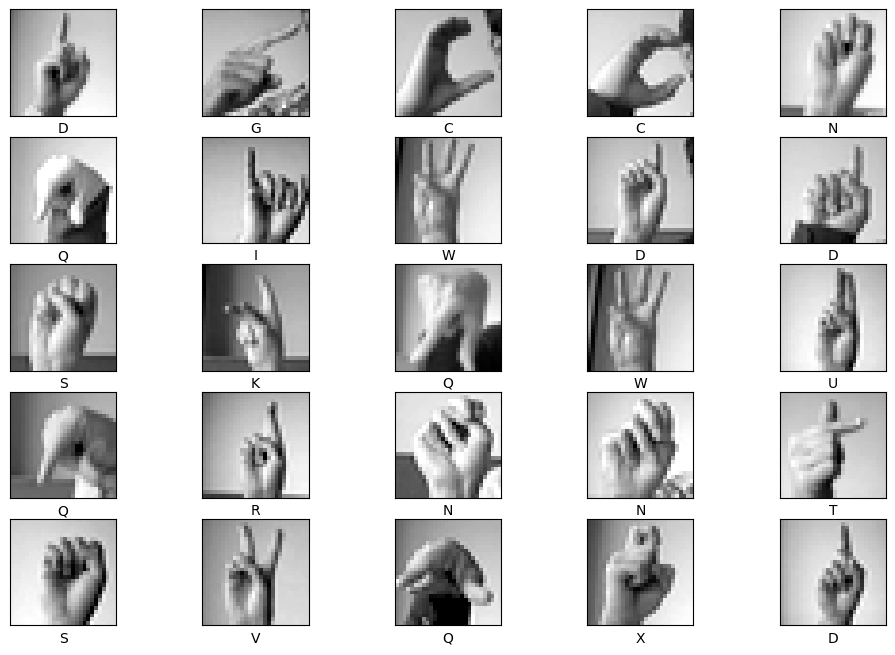

In [8]:
import matplotlib.pyplot as plt
import numpy as np
labels = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',19:'U',20:'V',21:'W',22:'X', 23:'Y'}

# visualize the Data along with the labels

plt.figure(figsize=(12,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.xlabel(labels[np.argmax(y_train[i])])
plt.show()


225/225 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       331
           1       0.97      0.97      0.97       432
           2       1.00      1.00      1.00       310
           3       0.91      0.99      0.95       245
           4       0.97      1.00      0.98       498
           5       1.00      0.96      0.98       247
           6       0.99      0.80      0.88       348
           7       0.93      0.99      0.96       436
           8       1.00      0.93      0.96       288
           9       0.75      0.94      0.84       331
          10       0.96      0.99      0.97       209
          11       0.97      0.99      0.98       394
          12       0.94      0.99      0.96       291
          13       1.00      1.00      1.00       246
          14       0.99      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.51   

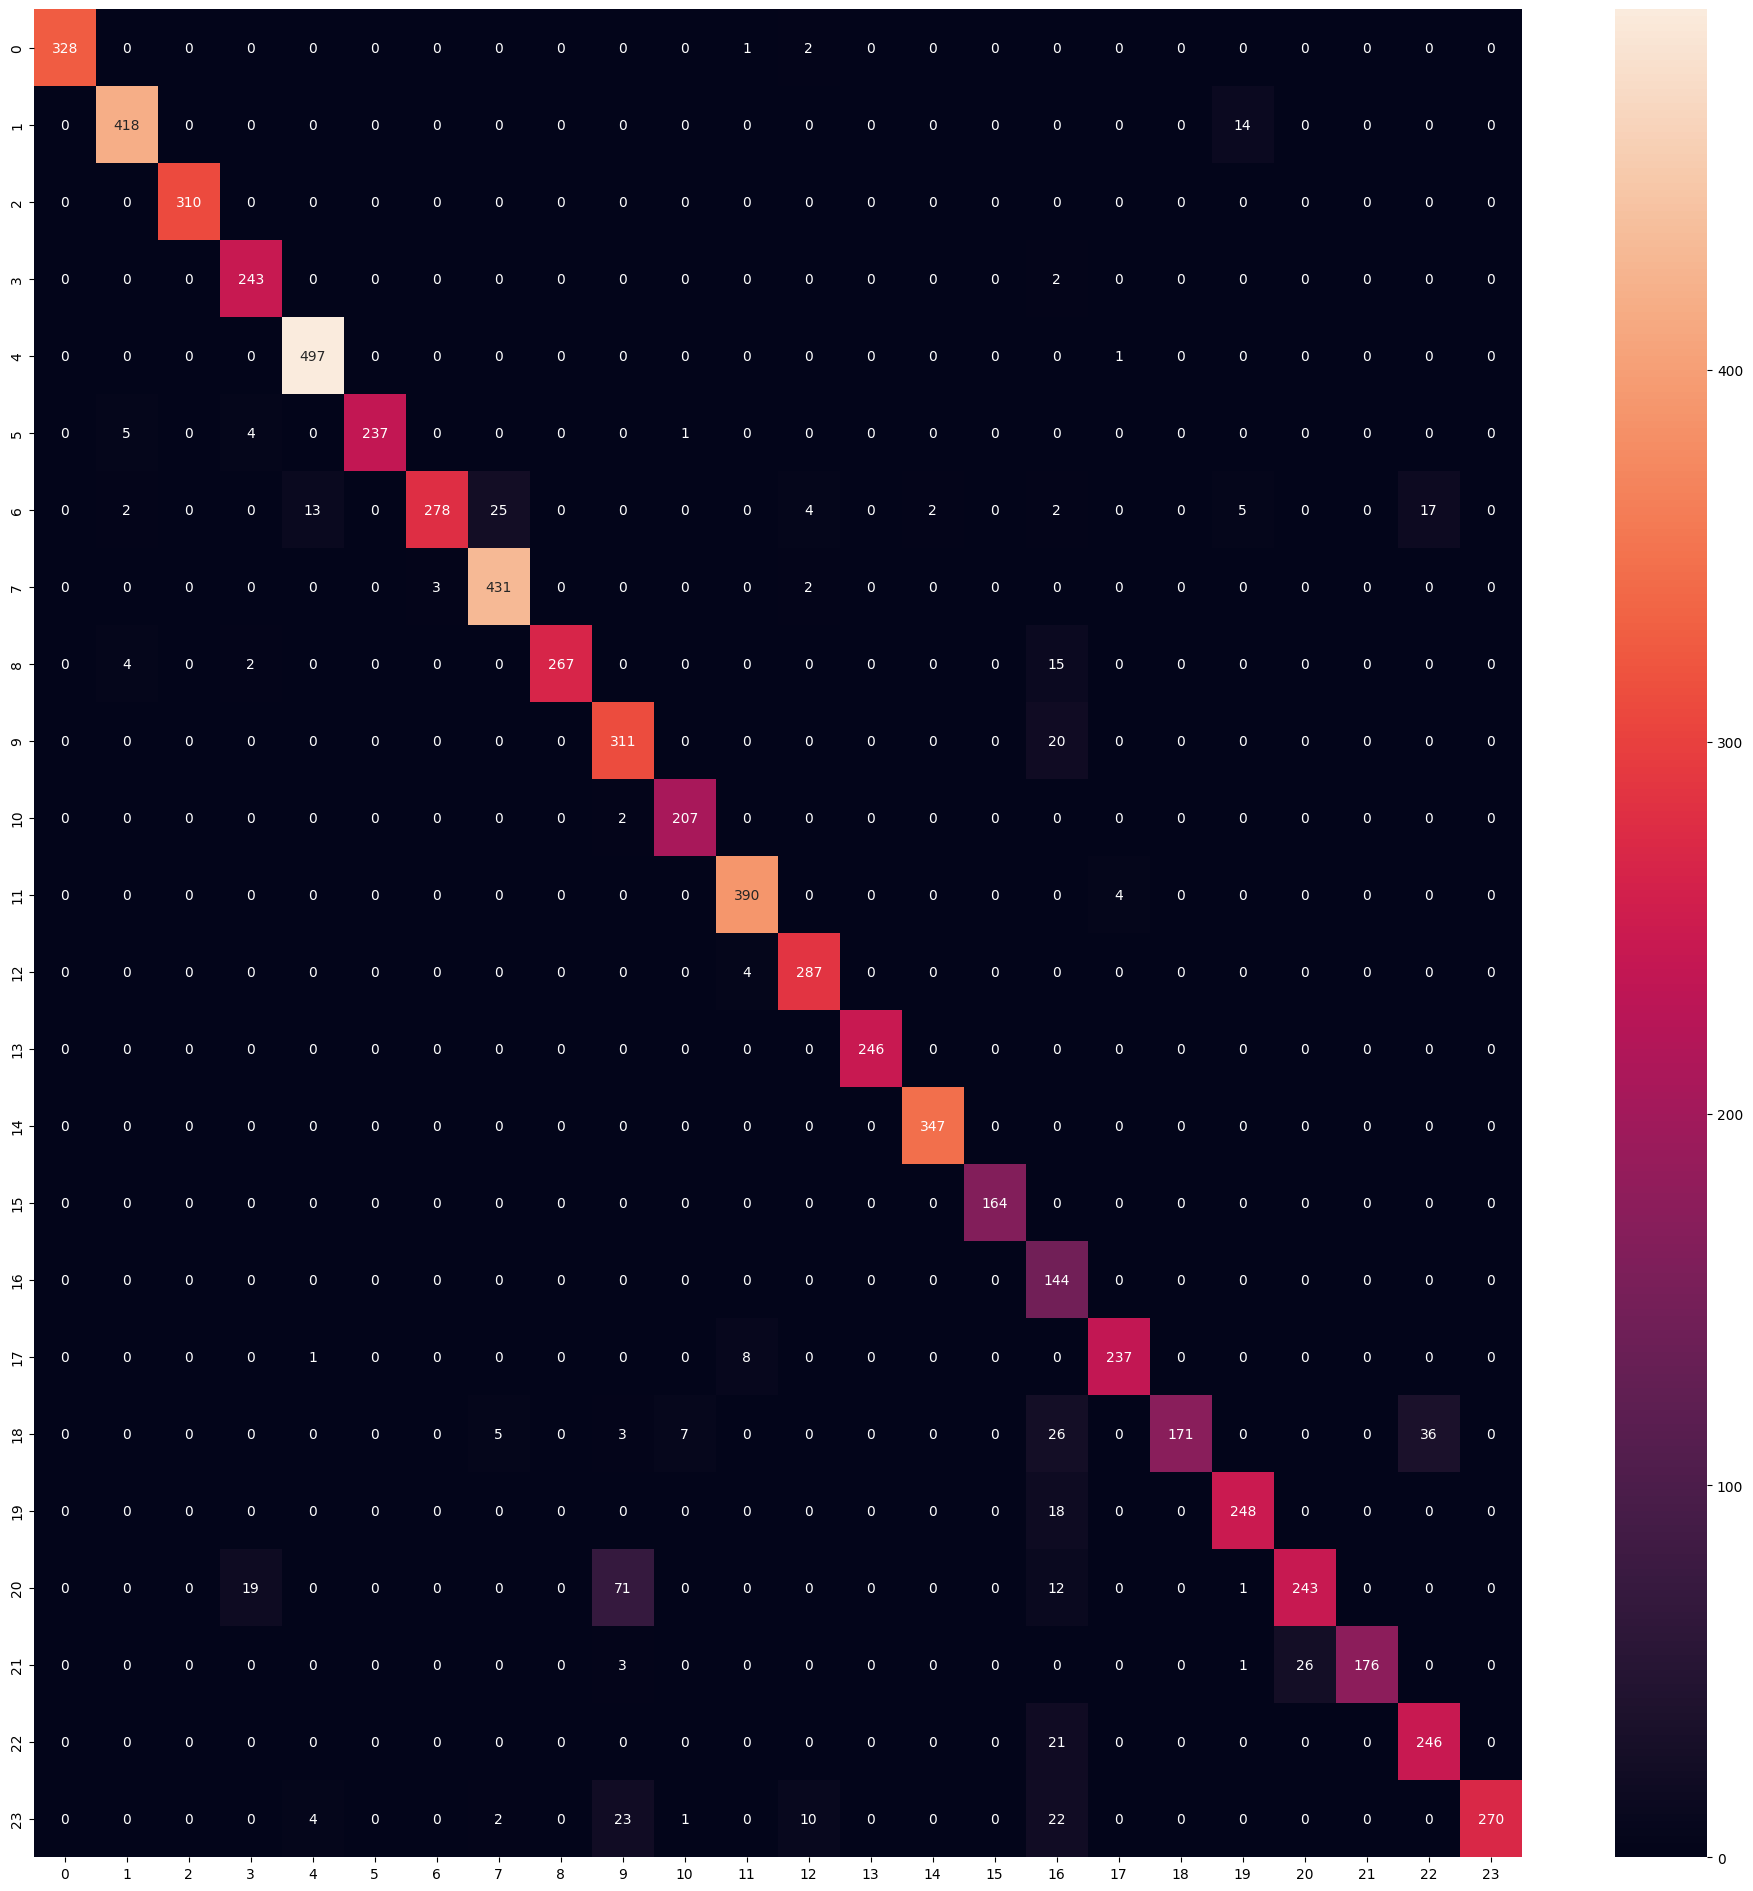

In [17]:
# go through all the images in training data set ( all 27455 images) and predict the labels
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

# print the classification report
print(classification_report(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(24,24))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


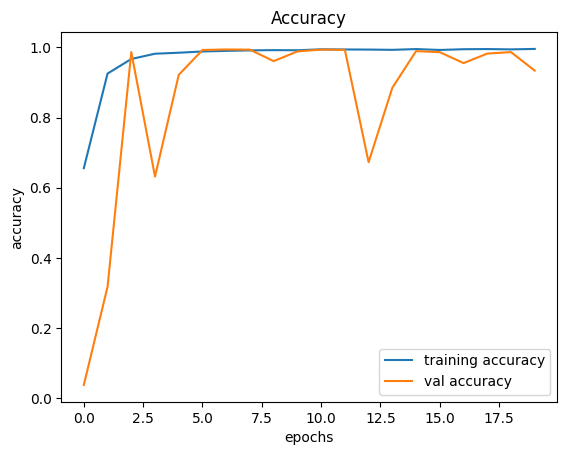

In [9]:
# plot the data set to see the distribution of the data
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [3]:
import cv2
import numpy as np
from keras.models import load_model
import os

# load the model
model = load_model('CSE572_DataMining.h5')

# dictionary to map the labels
labels = {
    0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', # No 9 for 'J'
    9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 
    18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y' # No 25 for 'Z'
}

# open the camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    frame = cv2.flip(frame, 1)
    # Draw the rectangle
    cv2.rectangle(frame, (100, 100), (700, 700), (255, 0, 0), 2)
    # Now extract the ROI using the frame itself
    roi = frame[100:400, 100:400]
    img = cv2.resize(roi, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    pred = model.predict([img])
    # Ensure prediction is within label range
    label_pred = np.argmax(pred)
    if label_pred in labels:
        cv2.putText(frame, labels[label_pred], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        print(f"Label {label_pred} not found in labels dictionary.")
    cv2.imshow('Sign Language Detection', frame)
    k = cv2.waitKey(10)
    if k == 27:  # Esc key to stop
        break

# Close the camera and windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


In [5]:
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model
import mediapipe as mp

# Mediapipe Hands setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.7,
                       min_tracking_confidence=0.7)

# Load the model
model = load_model('CSE572_DataMining.h5')

# Dictionary to map the labels
labels = {
    0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', # No 9 for 'J'
    9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 
    18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y' # No 25 for 'Z'
}


# Open the camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    frame = cv2.flip(frame, 1)

    # Normal mode
    cv2.rectangle(frame, (200, 200), (500, 500), (255, 0, 0), 2)
    roi = frame[200:500, 200:500]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    img = cv2.resize(roi, (28, 28))
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    pred = model.predict([img])
    cv2.putText(frame, labels[np.argmax(pred)], (10, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Sign Language Detection', frame)

    # Handle keys
    k = cv2.waitKey(10)
    if k == 27:  # Esc key to stop
        break
    elif k == 32:  # Space key for hand analysis mode
        analysis_frame = frame
        analysis_frame_rgb = cv2.cvtColor(analysis_frame, cv2.COLOR_BGR2RGB)
        results = hands.process(analysis_frame_rgb)
        hand_landmarks = results.multi_hand_landmarks
        if hand_landmarks:
            for handLms in hand_landmarks:
                # Here you would add your specific analysis and update the frame
                # For simplicity, this is omitted here
                pass

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 24ms/step


In [6]:
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model
import mediapipe as mp

# Mediapipe Hands setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=1,
                       min_detection_confidence=0.7,
                       min_tracking_confidence=0.7)

# Load the model
model = load_model('CSE572_DataMining.h5')

# Dictionary to map the labels
labels = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',  # No 9 for 'J'
    9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S',
    18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'  # No 25 for 'Z'
}

# Open the camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    frame = cv2.flip(frame, 1)

    # Define the smaller region of interest (ROI) coordinates
    cv2.rectangle(frame, (250, 250), (450, 450), (255, 0, 0), 2)  # Draw the smaller blue box
    roi = frame[250:450, 250:450]  # Adjust the ROI slice
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    img = cv2.resize(roi, (28, 28))
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    pred = model.predict([img])
    cv2.putText(frame, labels[np.argmax(pred)], (10, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Sign Language Detection', frame)

    # Handle keys
    k = cv2.waitKey(10)
    if k == 27:  # Esc key to stop
        break
    elif k == 32:  # Space key for hand analysis mode
        analysis_frame = frame
        analysis_frame_rgb = cv2.cvtColor(analysis_frame, cv2.COLOR_BGR2RGB)
        results = hands.process(analysis_frame_rgb)
        hand_landmarks = results.multi_hand_landmarks
        if hand_landmarks:
            for handLms in hand_landmarks:
                # Here you would add your specific analysis and update the frame
                # For simplicity, this is omitted here
                pass

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step
